<a href="https://colab.research.google.com/github/hargurjeet/MachineLearning/blob/master/Nifty_50_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

High level steps to approach the problem statement

<br> Import the dataset
<br>  Visualize the Time Series Data
<br>  Make the time series data stationary
<br>  Plot the Correlation and AutoCorrelation Charts
<br> Construct the ARIMA Model or Seasonal ARIMA based on the data
<br> Use the model to make predictions


In [2]:
!pip install opendatasets 

In [14]:
# Importing the dataset
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
kaggle_url = 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=TITAN.csv'
od.download(kaggle_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hargurjeet
Your Kaggle Key: ··········


100%|██████████| 18.4M/18.4M [00:00<00:00, 32.8MB/s]


In [5]:
file_path = '/content/nifty50-stock-market-data/ASIANPAINT.csv'
df = pd.read_csv(file_path)

df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [6]:
## Visualize the time series

titan_opening_price = df[['Date', 'VWAP']]

titan_opening_price.set_index('Date', inplace=True)

titan_opening_price.index = pd.to_datetime(titan_opening_price.index, format="%Y-%m-%d")

titan_opening_price.head()

,VWAP
Date,
2000-01-03,380.54
2000-01-04,383.50
2000-01-05,379.81
2000-01-06,379.88
2000-01-07,383.38


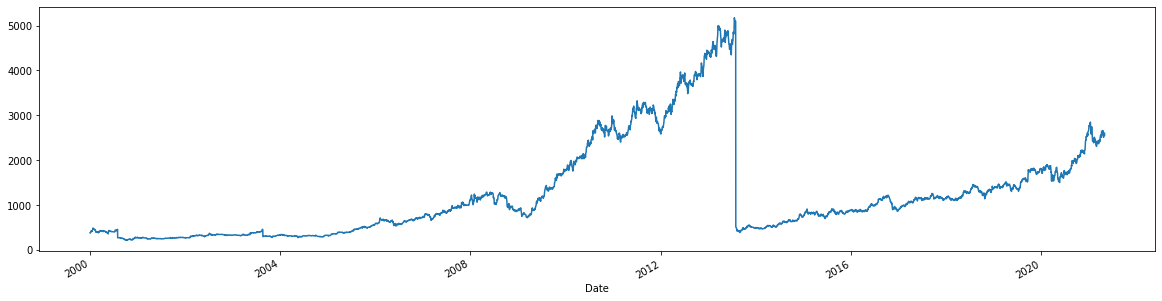

In [11]:
# visualize the data
plt.rcParams['figure.figsize'] = (20, 5)
titan_opening_price.VWAP.plot() ;

In [12]:
## testing for stationary
test_result=adfuller(titan_opening_price['VWAP'])

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Open):
    result=adfuller(Open)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [13]:
adfuller_test(titan_opening_price['VWAP'])

ADF Test Statistic : -2.1240473336295325
p-value : 0.23495562118424446
#Lags Used : 9
Number of Observations Used : 5296
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


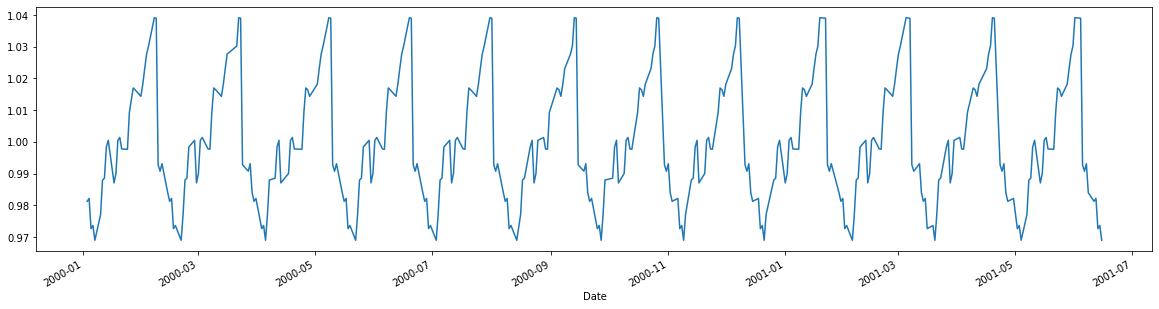

In [28]:
## Performing time series decomposition

result=seasonal_decompose(x=titan_opening_price['VWAP'].head(365), model='multiplicable', freq=30)

result.seasonal.plot();

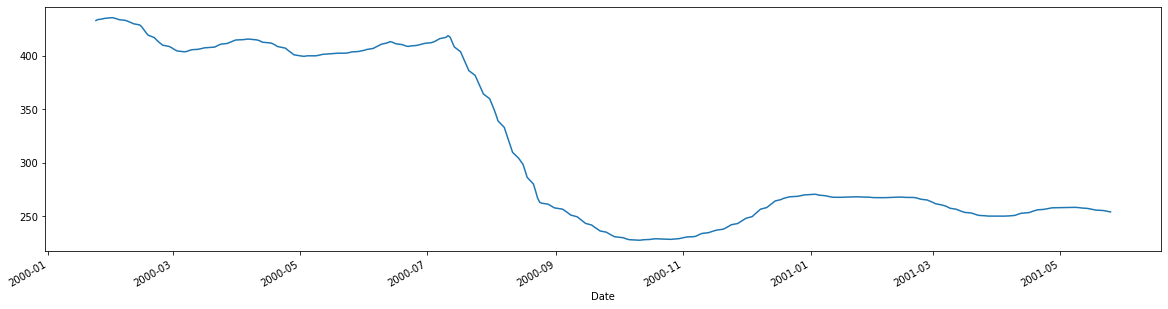

In [29]:
result.trend.plot();

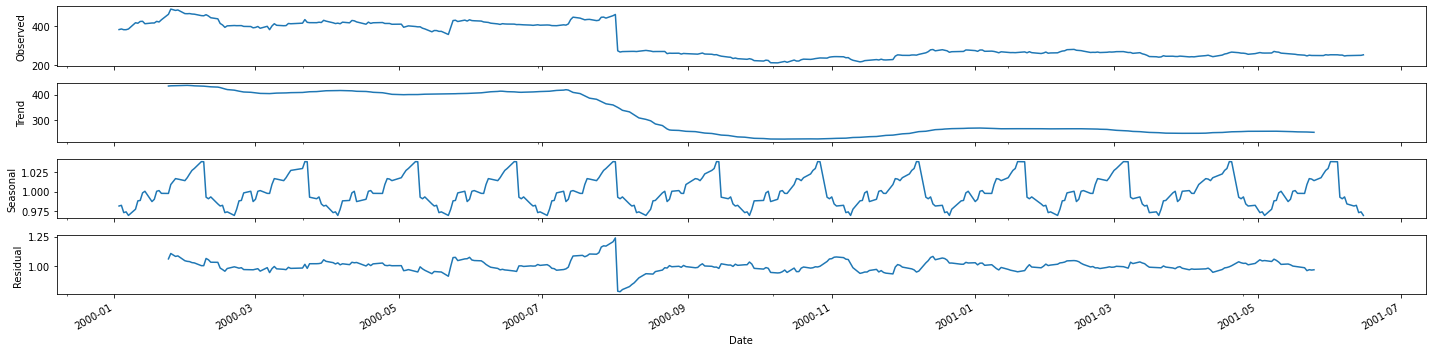

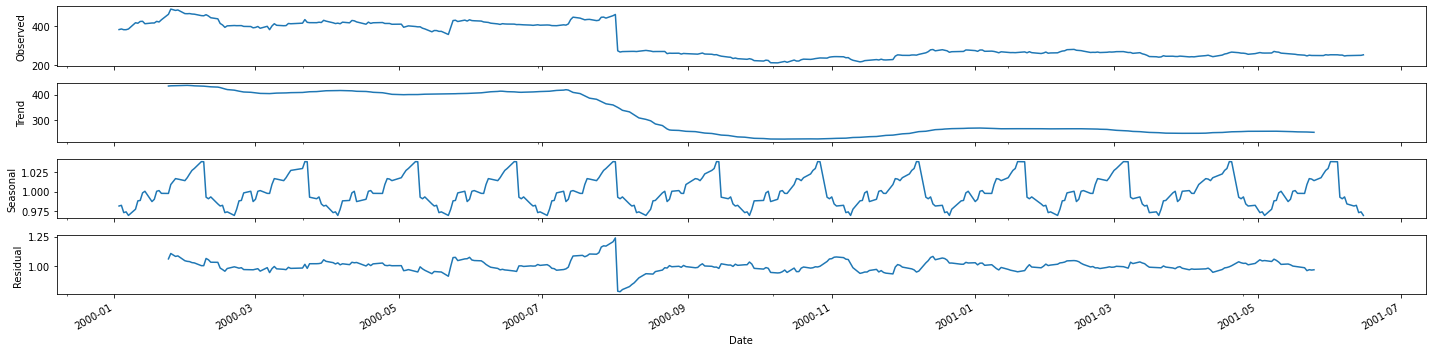

In [30]:
result.plot()